In [0]:
import pandas as pd
import numpy as np
import pandas as pd 
#pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import re
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [0]:
train_data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train_2kmZucJ.csv")
test_data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/test_oJQbWVk.csv")

In [5]:
print(train_data.shape,test_data.shape)

(7920, 3) (1953, 2)


In [0]:
targets=train_data["label"]

**1)cleaning and  preprocess  data**

In [0]:
train_data.drop('label',1,inplace=True)
train_test_data = train_data.append(test_data)
train_test_data.reset_index(inplace=True)

In [8]:
from tqdm import tqdm
preprocessed_tweet= []
# tqdm is for printing the status bar
for text in tqdm(train_test_data["tweet"].values):
    text=re.sub(r'http\S+', '', text)#remove all the http links
    #text = ' '.join(e for e in text.split() if e not in stopwords)
    preprocessed_tweet.append(text.lower().strip())

100%|██████████| 9873/9873 [00:00<00:00, 128003.35it/s]


In [0]:
train_test_data["pre_tweet"]=preprocessed_tweet

In [0]:
train_test_data['pre_tweet'] = train_test_data['pre_tweet'].str.replace("[^a-zA-Z#]", " ")
train_test_data["pre_tweet"]=train_test_data["pre_tweet"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
#combi.head(10)

In [0]:
#train_test_data['pre_tweet']

In [0]:
final_Train=train_test_data.iloc[:7920,:]
final_Test=train_test_data.iloc[7920:,:]

In [0]:
#targets

In [14]:
final_Train.head()

,index,id,tweet,pre_tweet
0,0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test #android #apps #b...
1,1,2,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,2,3,We love this! Would you go? #talk #makememorie...,love this would #talk #makememories #unplug #r...
3,3,4,I'm wired I know I'm George I was made that wa...,wired know george made that #iphone #cute #dav...
4,4,5,What amazing service! Apple won't even talk to...,what amazing service apple even talk about que...


In [15]:
print(final_Train.shape,final_Test.shape,targets.shape)

(7920, 4) (1953, 4) (7920,)


**Story Generation and Visualization from Tweets**</br>
A) Understanding the common words used in the tweets: WordCloud(train data)

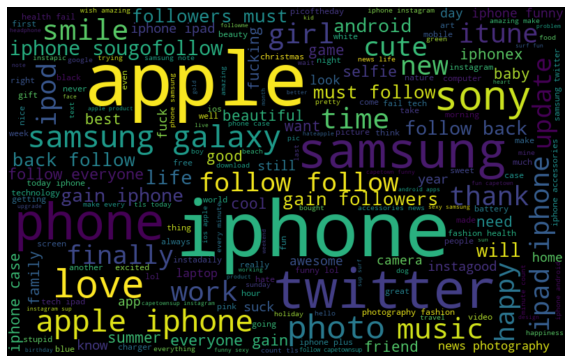

In [16]:
all_words = ' '.join([text for text in final_Train["pre_tweet"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

B) Understanding the common words used in the tweets: WordCloud(test data)

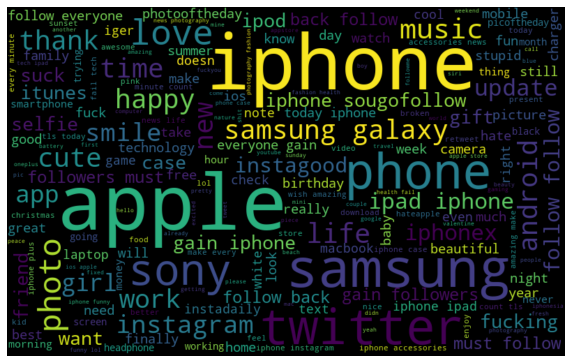

In [17]:
all_words = ' '.join([text for text in final_Test["pre_tweet"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
final_Train["label"]=targets

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
final_Train.head()

,index,id,tweet,pre_tweet,label
0,0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test #android #apps #b...,0
1,1,2,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...,0
2,2,3,We love this! Would you go? #talk #makememorie...,love this would #talk #makememories #unplug #r...,0
3,3,4,I'm wired I know I'm George I was made that wa...,wired know george made that #iphone #cute #dav...,0
4,4,5,What amazing service! Apple won't even talk to...,what amazing service apple even talk about que...,1


C)Words in positive tweets

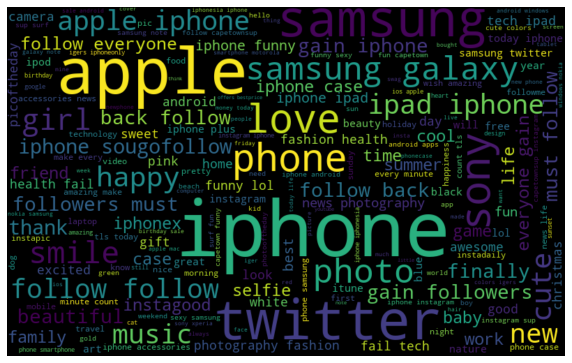

In [20]:
normal_words =' '.join([text for text in final_Train['pre_tweet'][final_Train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

D) Words in negative tweets

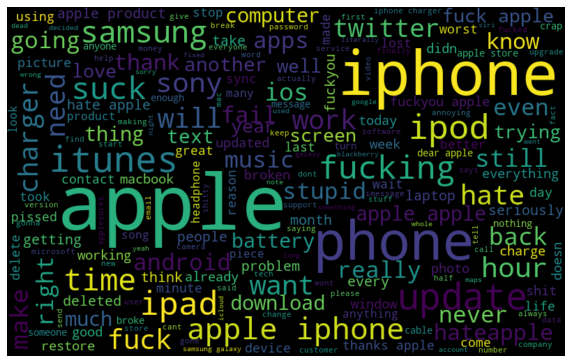

In [21]:
normal_words =' '.join([text for text in final_Train['pre_tweet'][final_Train['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from non racist/sexist tweets

HT_positive = hashtag_extract(final_Train['pre_tweet'][final_Train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(final_Train['pre_tweet'][final_Train['label'] == 1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

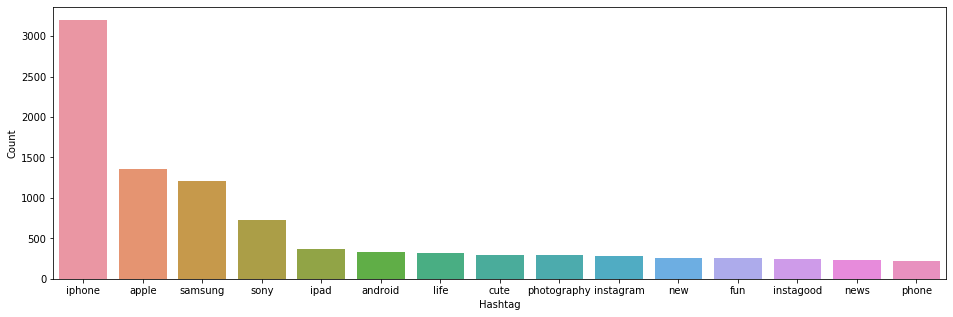

In [24]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

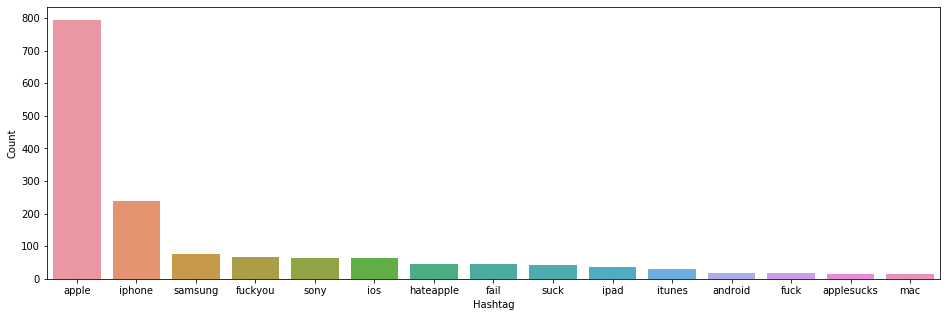

In [25]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [26]:
final_Train["pre_tweet"]=final_Train['pre_tweet'].str.replace("[^a-zA-Z]", " ")
final_Test["pre_tweet"]=final_Test['pre_tweet'].str.replace("[^a-zA-Z]", " ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Make Data Model Ready:**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

**bow**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [88]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(final_Train["pre_tweet"])
bow_test = bow_vectorizer.fit_transform(final_Test["pre_tweet"])
bow.shape
print(bow.shape)
print(bow_test.shape)

(7920, 1000)
(1953, 1000)


**TFIDF**

In [82]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(final_Train["pre_tweet"])
tfidf_test = tfidf_vectorizer.fit_transform(final_Test["pre_tweet"])
tfidf.shape
print(tfidf.shape)
print(tfidf_test.shape)

(7920, 1000)
(1953, 1000)


**word2vec**

In [33]:
i=0
list_of_sentance_train=[]
for sentance in final_Train["pre_tweet"].values:
    list_of_sentance_train.append(sentance.split())
print(list_of_sentance_train)    

[['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone'], ['finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias'], ['love', 'this', 'would', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect'], ['wired', 'know', 'george', 'made', 'that', 'iphone', 'cute', 'daventry', 'home'], ['what', 'amazing', 'service', 'apple', 'even', 'talk', 'about', 'question', 'have', 'unless', 'them', 'their', 'stupid', 'support'], ['iphone', 'software', 'update', 'fucked', 'phone', 'time', 'stupid', 'iphones'], ['happy', 'instapic', 'instadaily', 'sony', 'xperia', 'xperiaz'], ['type', 'charger', 'cable', 'bay', 'amazon', 'etsy', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', 'newyear', 'starting', 'recipes', 'technology', 'samsunggalaxys', 'iphonex', 'twitter', 'pjiwq'], ['bout', 'shopping', 'again', 'listening', 'm

In [36]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# this line of code trains your w2v model on the give list of sentances
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=300, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  2272
sample words  ['fingerprint', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'case', 'thanks', 'yay', 'sony', 'xperia', 'love', 'this', 'would', 'talk', 'relax', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'made', 'that', 'home', 'what', 'amazing', 'service', 'apple', 'even', 'about', 'have', 'them', 'their', 'stupid', 'support', 'software', 'update', 'fucked', 'phone', 'time', 'iphones', 'happy', 'instapic', 'instadaily']


In [37]:
sent_vectors_train = [];
for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
sent_vectors_train = np.array(sent_vectors_train)
print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))

100%|██████████| 7920/7920 [00:01<00:00, 5458.71it/s]

7920
300


test data

In [38]:
i=0
list_of_sentance_test=[]
for sentance in final_Test["pre_tweet"].values:
    list_of_sentance_test.append(sentance.split())
print(list_of_sentance_test)    

[['hate', 'iphone', 'upgrade', 'download', 'apps', 'ugh', 'apple', 'sucks'], ['currently', 'shitting', 'fucking', 'pants', 'apple', 'imac', 'cashmoney', 'raddest', 'swagswagswag'], ['like', 'puts', 'some', 'roms', 'ipad', 'that', 'possible', 'wouldn', 'that', 'block', 'screen'], ['ipod', 'officially', 'dead', 'lost', 'pictures', 'videos', 'from', 'concert', 'from', 'camp', 'hatinglife', 'sobbing'], ['been', 'fighting', 'itunes', 'night', 'only', 'want', 'music', 'paid'], ['repost', 'getbakednfried', 'with', 'repostapp', 'announce', 'will', 'have', 'apple', 'bourbon'], ['this', 'apple', 'software', 'update', 'really', 'doing', 'things', 'phone', 'things', 'apple'], ['baby', 'iphone', 'iphone', 'gold', 'new', 'apple', 'appleisbest', 'geg', 'aaaaah'], ['confused', 'have', 'take', 'time', 'appointment', 'still', 'waiting', 'minutes', 'after', 'fact'], ['fruit', 'just', 'tastes', 'better', 'when', 'pick', 'yourself', 'apple', 'healthy', 'fruit', 'nyc', 'twitter', 'thmek'], ['buddy', 'edgar'

In [39]:
sent_vectors_test = [];
for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
sent_vectors_test = np.array(sent_vectors_test)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

100%|██████████| 1953/1953 [00:00<00:00, 5671.82it/s]

1953
300


<h3>Model Building</h3><br>
<h5>Logistic Regression on bow</h5>

In [0]:
df_output = pd.DataFrame()
aux = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/test_oJQbWVk.csv')
df_output['id'] = aux['id']

In [0]:
X_train,X_test, y_train, y_test = train_test_split(bow, targets,  
                                                          random_state=42, 
                                                          test_size=0.2)

In [43]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train) # training the model
prediction = lreg.predict_proba(X_test) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int) # calculating f1 score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7880658436213993

In [0]:
test_pred = lreg.predict_proba(bow_test)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
df_output['label'] =test_pred_int
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_lr_bow.csv',index=False)

**Public Leaderboard F1 Score: 0.534**

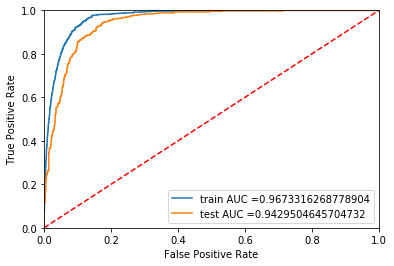

In [45]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

train_fpr, train_tpr, thresholds = roc_curve(y_train, lreg.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, lreg.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [46]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm_train=confusion_matrix(y_train, lreg.predict(X_train))
cm_test=confusion_matrix(y_test, lreg.predict(X_test))
print(cm_train)
print("Test confusion matrix")
print(cm_test)


Train confusion matrix
[[4493  249]
 [ 304 1290]]
Test confusion matrix
[[1073   79]
 [ 116  316]]


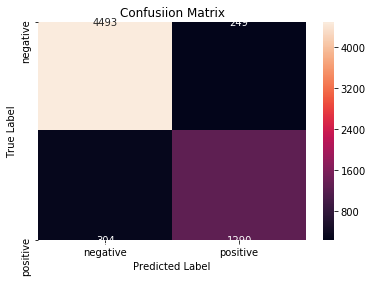

In [47]:
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_train, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

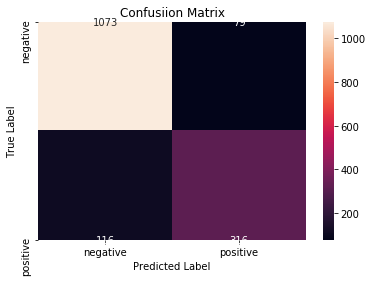

In [48]:
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_test, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Logistic Regression on tfidf

In [0]:
X_train,X_test, y_train, y_test = train_test_split(tfidf, targets,  
                                                          random_state=42, 
                                                          test_size=0.2)

In [63]:
lreg_tfidf = LogisticRegression()
lreg_tfidf.fit(X_train, y_train) # training the model
prediction = lreg_tfidf.predict_proba(X_test) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int) # calculating f1 score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8104166666666667

In [0]:
test_pred = lreg_tfidf.predict_proba(tfidf_test)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

In [0]:
df_output['label'] =test_pred_int
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_lr_tfidf.csv',index=False)

**Public Leaderboard F1 Score: 0.598**

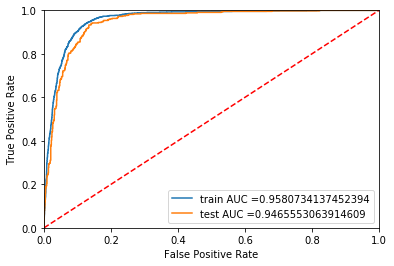

In [66]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

train_fpr, train_tpr, thresholds = roc_curve(y_train, lreg_tfidf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, lreg_tfidf.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [68]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm_train=confusion_matrix(y_train, lreg_tfidf.predict(X_train))
cm_test=confusion_matrix(y_test, lreg_tfidf.predict(X_test))
print(cm_train)
print("Test confusion matrix")
print(cm_test)


Train confusion matrix
[[4510  232]
 [ 411 1183]]
Test confusion matrix
[[1094   58]
 [ 136  296]]


Logistic Regression on w2v

In [0]:
X_train,X_test, y_train, y_test = train_test_split(sent_vectors_train, targets,  
                                                          random_state=42, 
                                                          test_size=0.2)

In [70]:
lreg_w2v = LogisticRegression()
lreg_w2v.fit(X_train, y_train) # training the model
prediction = lreg_w2v.predict_proba(X_test) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int) # calculating f1 score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7218344965104685

In [0]:
test_pred = lreg_w2v.predict_proba(sent_vectors_test)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
df_output['label'] =test_pred_int
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_lr_w2v.csv',index=False)

**Public Leaderboard F1 Score: 0.7901**




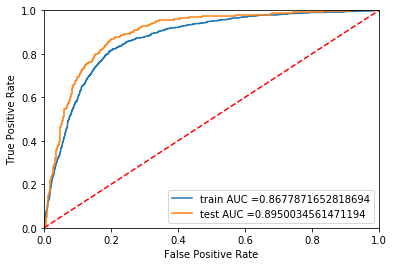

In [72]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

train_fpr, train_tpr, thresholds = roc_curve(y_train, lreg_w2v.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, lreg_w2v.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [73]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm_train=confusion_matrix(y_train, lreg_w2v.predict(X_train))
cm_test=confusion_matrix(y_test, lreg_w2v.predict(X_test))
print(cm_train)
print("Test confusion matrix")
print(cm_test)


Train confusion matrix
[[4469  273]
 [ 954  640]]
Test confusion matrix
[[1096   56]
 [ 237  195]]


<h3><b>2. Support Vector Machine

In [0]:
from sklearn import svm

Bag-of-Words Features

In [0]:
X_train_bow,X_test_bow, y_train_bow, y_test_bow = train_test_split(bow, targets,  
                                                          random_state=42, 
                                                          test_size=0.2)

In [102]:
svc_bow = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train_bow,y_train_bow)

prediction = svc_bow.predict_proba(X_test_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(y_test_bow, prediction_int) # calculating f1 score

0.762993762993763

In [0]:
test_pred = svc_bow.predict_proba(bow_test)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
df_output['label'] =test_pred_int
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_svm_bow.csv',index=False)

**Public Leaderboard F1 Score: 0.555**

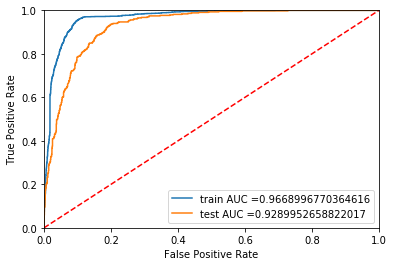

In [105]:
train_fpr, train_tpr, thresholds = roc_curve(y_train_bow, svc_bow.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test_bow, svc_bow.predict_proba(X_test_bow)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm_train=confusion_matrix(y_train, svc_bow.predict(X_train_bow))
cm_test=confusion_matrix(y_test, svc_bow.predict(X_test_bow))
print(cm_train)
print("Test confusion matrix")
print(cm_test)


Train confusion matrix
[[4476  266]
 [ 238 1356]]
Test confusion matrix
[[1050  102]
 [ 119  313]]


**TF-IDF Features**

In [0]:
X_train_tfidf,X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf, targets,  
                                                          random_state=42, 
                                                          test_size=0.2)

In [109]:
svc_tfidf = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train_tfidf,y_train_tfidf)

prediction = svc_tfidf.predict_proba(X_test_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(y_test_tfidf, prediction_int) # calculating f1 score

0.7870270270270271

In [0]:
test_pred = svc_tfidf.predict_proba(tfidf_test)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
df_output['label'] =test_pred_int
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_svm_tfidf.csv',index=False)

**Public Leaderboard F1 Score: 585**

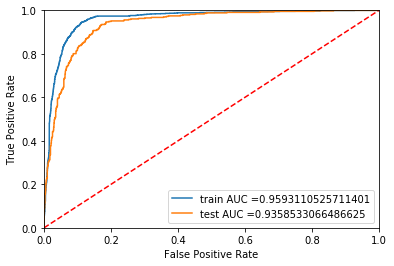

In [113]:
train_fpr, train_tpr, thresholds = roc_curve(y_train_tfidf, svc_tfidf.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test_tfidf, svc_tfidf.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm_train=confusion_matrix(y_train_tfidf, svc_tfidf.predict(X_train_tfidf))
cm_test=confusion_matrix(y_test_tfidf, svc_tfidf.predict(X_test_tfidf))
print(cm_train)
print("Test confusion matrix")
print(cm_test)


Train confusion matrix
[[4461  281]
 [ 256 1338]]
Test confusion matrix
[[1066   86]
 [ 104  328]]


**w2v feature**

In [0]:
X_train_w2v,X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(sent_vectors_train, targets,  
                                                          random_state=42, 
                                                          test_size=0.2)

In [117]:
svc_w2v = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train_w2v,y_train_w2v)

prediction = svc_w2v.predict_proba(X_test_w2v) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(y_test_w2v, prediction_int) # calculating f1 score

0.7331975560081467

In [0]:
test_pred = svc_w2v.predict_proba(sent_vectors_test)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
df_output['label'] =test_pred_int
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_svm_w2v.csv',index=False)

In [0]:
df_output['label'] =predict_output(svc_w2v,sent_vectors_test)
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_svm_w2v_new.csv',index=False)

**Public Leaderboard F1 Score: 800**

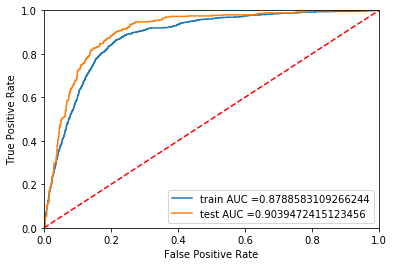

In [119]:
train_fpr, train_tpr, thresholds = roc_curve(y_train_w2v, svc_w2v.predict_proba(X_train_w2v)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test_w2v, svc_w2v.predict_proba(X_test_w2v)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [120]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm_train=confusion_matrix(y_train_w2v, svc_w2v.predict(X_train_w2v))
cm_test=confusion_matrix(y_test_w2v, svc_w2v.predict(X_test_w2v))
print(cm_train)
print("Test confusion matrix")
print(cm_test)


Train confusion matrix
[[4401  341]
 [ 820  774]]
Test confusion matrix
[[1076   76]
 [ 196  236]]


<h3> <b>3. RandomForest</h3>

In [0]:
from sklearn.ensemble import RandomForestClassifier


Bag-of-Words Features

In [122]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(X_train_bow, y_train_bow)
prediction = rf.predict(X_test_bow)
f1_score(y_test_bow, prediction)

0.7630057803468208

In [0]:
def predict_output(model,data):
    test_pred=model.predict_proba(data)   
    test_pred_int = test_pred[:,1] >= 0.3
    test_pred_int = test_pred_int.astype(np.int)
    return test_pred_int

In [0]:
df_output['label'] = predict_output(rf,bow_test)
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_rf_bow.csv',index=False)

Public Leaderboard F1 Score: 146

In [0]:
def auc_roc_plot(model,x_train,x_test):
    train_fpr, train_tpr, thresholds = roc_curve(y_train_bow, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test_bow, model.predict_proba(x_test)[:,1])
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend(loc=4)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   
    print("Train confusion matrix")
    cm_train=confusion_matrix(y_train_bow, model.predict(x_train))
    cm_test=confusion_matrix(y_test_bow, model.predict(x_test))
    print(cm_train)
    print("Test confusion matrix")
    print(cm_test)


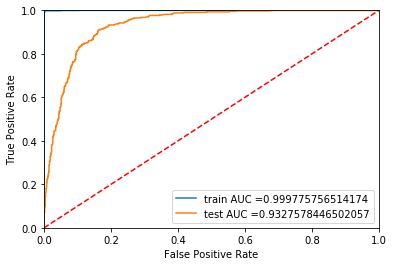

Train confusion matrix
[[4733    9]
 [  11 1583]]
Test confusion matrix
[[1049  103]
 [ 102  330]]


In [135]:
auc_roc_plot(rf,X_train_bow,X_test_bow)

TFIDF features

In [137]:
rf_tfidf = RandomForestClassifier(n_estimators=400, random_state=11).fit(X_train_tfidf, y_train_tfidf)
prediction = rf_tfidf.predict(X_test_tfidf)
f1_score(y_test_tfidf, prediction)

0.7329974811083124

In [0]:
df_output['label'] = predict_output(rf_tfidf,tfidf_test)
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_rf_tfidf.csv',index=False)

Public Leaderboard F1 Score: 135

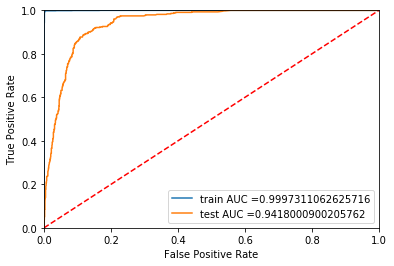

Train confusion matrix
[[4733    9]
 [  13 1581]]
Test confusion matrix
[[1081   71]
 [ 141  291]]


In [139]:
auc_roc_plot(rf_tfidf,X_train_tfidf,X_test_tfidf)

**w2v features**

In [140]:
rf_w2v = RandomForestClassifier(n_estimators=400, random_state=11).fit(X_train_w2v, y_train_w2v)
prediction = rf_w2v.predict(X_test_w2v)
f1_score(y_test_w2v, prediction)

0.7105263157894737

In [0]:
df_output['label'] = predict_output(rf_w2v,sent_vectors_test)
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_rf_w2v.csv',index=False)

Public Leaderboard F1 Score: 815

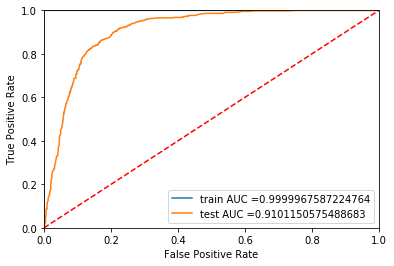

Train confusion matrix
[[4741    1]
 [   6 1588]]
Test confusion matrix
[[1045  107]
 [ 135  297]]


In [143]:
auc_roc_plot(rf_w2v,X_train_w2v,X_test_w2v)

<h2><b>4. XGBoost

In [0]:
from xgboost import XGBClassifier

In [146]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(X_train_bow, y_train_bow)
prediction = xgb_model.predict(X_test_bow)
f1_score(y_test_bow, prediction)

0.7530562347188262

In [0]:
df_output['label'] = predict_output(xgb_model,bow_test)
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_xgb_bow.csv',index=False)

Public Leaderboard F1 Score: 325

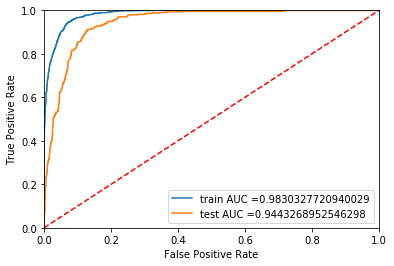

Train confusion matrix
[[4551  191]
 [ 220 1374]]
Test confusion matrix
[[1074   78]
 [ 124  308]]


In [148]:
auc_roc_plot(xgb_model,X_train_bow,X_test_bow)

TFIDF features

In [149]:
xgb_tfidf = XGBClassifier(max_depth=6, n_estimators=1000).fit(X_train_tfidf, y_train_tfidf)
prediction = xgb_tfidf.predict(X_test_tfidf)
f1_score(y_test_tfidf, prediction)

0.7442424242424243

In [0]:
df_output['label'] = predict_output(xgb_tfidf,tfidf_test)
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_xgb_tfidf.csv',index=False)

Public Leaderboard F1 Score: 275

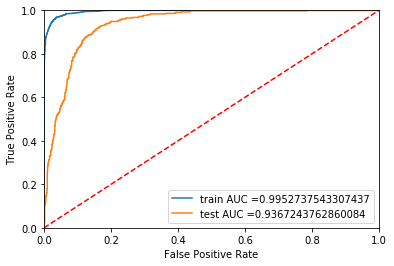

Train confusion matrix
[[4655   87]
 [ 107 1487]]
Test confusion matrix
[[1066   86]
 [ 125  307]]


In [151]:
auc_roc_plot(xgb_tfidf,X_train_tfidf,X_test_tfidf)

W2V features

In [155]:
xgb_w2v = XGBClassifier(max_depth=6, n_estimators=1000).fit(X_train_w2v, y_train_w2v)
prediction = xgb_w2v.predict(X_test_w2v)
f1_score(y_test_w2v, prediction)

0.7242990654205607

In [0]:
df_output['label'] = predict_output(xgb_w2v,sent_vectors_test)
df_output[['id','label']].to_csv('/content/drive/My Drive/Colab Notebooks/data/sub_xgb_w2v.csv',index=False)

Public Leaderboard F1 Score: 84.3

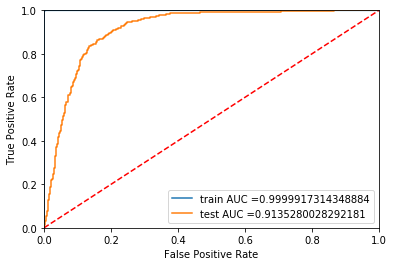

Train confusion matrix
[[4741    1]
 [   7 1587]]
Test confusion matrix
[[1038  114]
 [ 122  310]]


In [157]:
auc_roc_plot(xgb_w2v,X_train_w2v,X_test_w2v)

<h2><b>Conclusion

In [0]:
from prettytable import PrettyTable

In [172]:
x = PrettyTable()
x.field_names = ["Vectorizer", "algorithm ", "train","test"]
x.add_row(["BOW","logistic regression",78.80,53.4])
x.add_row(["TFIDF","logistic regression",81.04,59.8])
x.add_row(["W2V","logistic regression",72.18,79.01])

x.add_row(["BOW","SVM",76.29,55.5])
x.add_row(["TFIDF","SVM",78.70,58.5])
x.add_row(["W2V","SVM",73.19,80.0])

x.add_row(["BOW","random forest",76.30,14.6])
x.add_row(["TFIDF","random forest",73.29,13.5])
x.add_row(["W2V","random forest",71.05,81.5])

x.add_row(["BOW","XGboost",75.30,32.5])
x.add_row(["TFIDF","XGboost",74.42,27.5])
x.add_row(["W2V","XGboost",72.42,84.3])



print(x)


+------------+---------------------+-------+-------+
| Vectorizer |      algorithm      | train |  test |
+------------+---------------------+-------+-------+
|    BOW     | logistic regression |  78.8 |  53.4 |
|   TFIDF    | logistic regression | 81.04 |  59.8 |
|    W2V     | logistic regression | 72.18 | 79.01 |
|    BOW     |         SVM         | 76.29 |  55.5 |
|   TFIDF    |         SVM         |  78.7 |  58.5 |
|    W2V     |         SVM         | 73.19 |  80.0 |
|    BOW     |    random forest    |  76.3 |  14.6 |
|   TFIDF    |    random forest    | 73.29 |  13.5 |
|    W2V     |    random forest    | 71.05 |  81.5 |
|    BOW     |       XGboost       |  75.3 |  32.5 |
|   TFIDF    |       XGboost       | 74.42 |  27.5 |
|    W2V     |       XGboost       | 72.42 |  84.3 |
+------------+---------------------+-------+-------+
